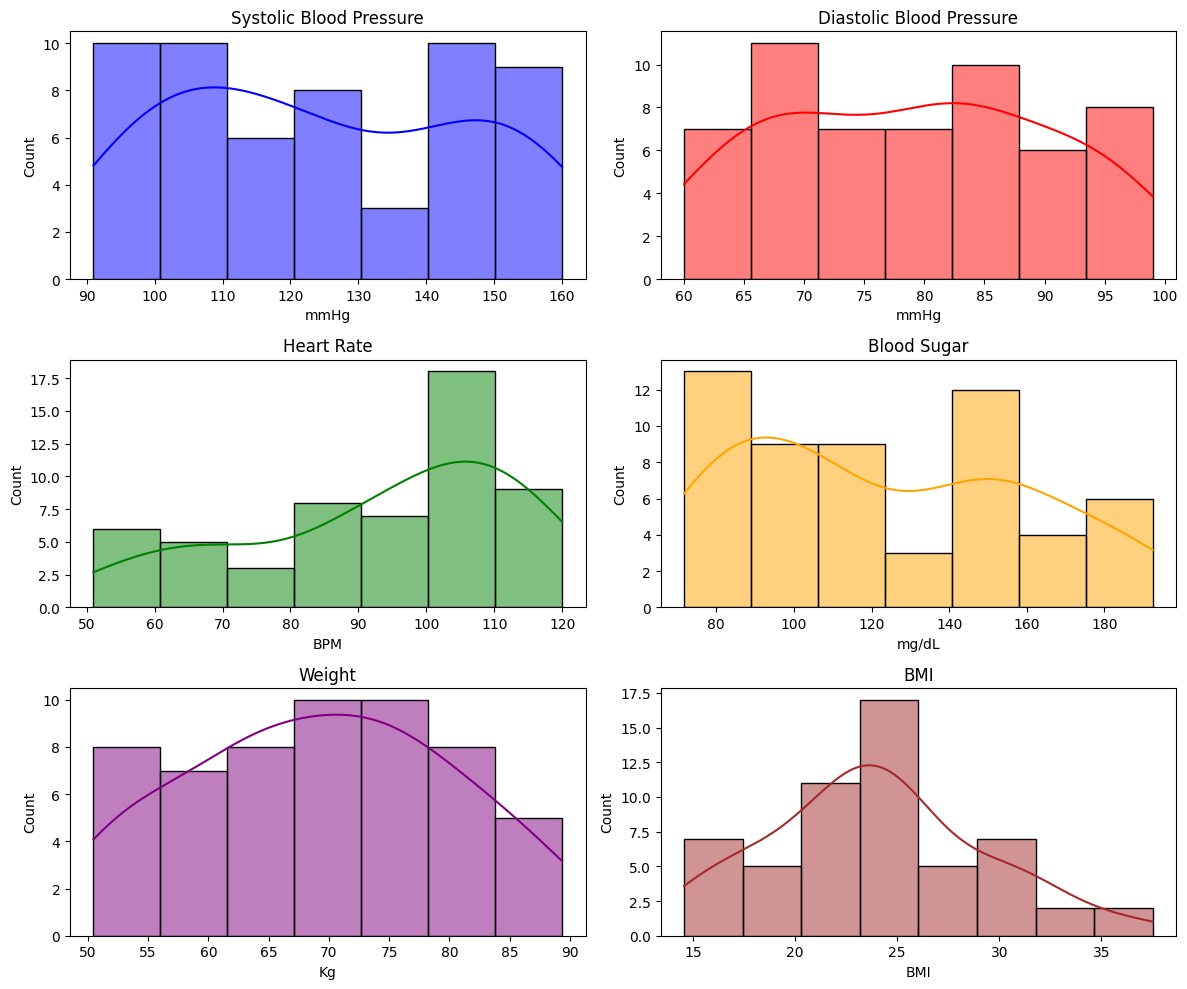

In [2]:
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Database Connection ---
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="ssm",
    database="hospital"
)
cursor = conn.cursor()

# --- Fetch health records directly for a given patient ID ---
patient_id = int(input("Enter patient ID: ").strip())

cursor.execute("""
    SELECT date_recorded, blood_pressure_systolic, blood_pressure_diastolic,
           heart_rate, blood_sugar_level, weight, height, BMI
    FROM HealthRecords
    WHERE patient_id = %s
    ORDER BY date_recorded
""", (patient_id,))

records = cursor.fetchall()
conn.close()

if not records:
    exit()

# --- Convert to Pandas DataFrame ---
df = pd.DataFrame(records, columns=[
    "date", "systolic", "diastolic", "heart_rate",
    "sugar", "weight", "height", "bmi"
])

# --- Plot histograms ---
plt.figure(figsize=(12, 10))

# Systolic Blood Pressure
plt.subplot(3, 2, 1)
sns.histplot(df["systolic"], kde=True, color="blue")
plt.title("Systolic Blood Pressure")
plt.xlabel("mmHg")

# Diastolic Blood Pressure
plt.subplot(3, 2, 2)
sns.histplot(df["diastolic"], kde=True, color="red")
plt.title("Diastolic Blood Pressure")
plt.xlabel("mmHg")

# Heart Rate
plt.subplot(3, 2, 3)
sns.histplot(df["heart_rate"], kde=True, color="green")
plt.title("Heart Rate")
plt.xlabel("BPM")

# Blood Sugar
plt.subplot(3, 2, 4)
sns.histplot(df["sugar"], kde=True, color="orange")
plt.title("Blood Sugar")
plt.xlabel("mg/dL")

# Weight
plt.subplot(3, 2, 5)
sns.histplot(df["weight"], kde=True, color="purple")
plt.title("Weight")
plt.xlabel("Kg")

# BMI
plt.subplot(3, 2, 6)
sns.histplot(df["bmi"], kde=True, color="brown")
plt.title("BMI")
plt.xlabel("BMI")

plt.tight_layout()
plt.show()
